# Notebooks, Imports and Packages

In [50]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

%matplotlib inline

# Example 1: A simple cost function
## $$f(x) = x^2 + x + 1$$

In [6]:
def f(x):
    return x**2 + x + 1

In [7]:
# Make Data
x_1 = np.linspace(start=-3,stop=3, num=500)

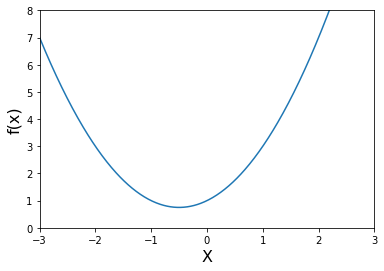

In [8]:
# Plot
plt.xlim((-3, 3))
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

In [9]:
# NOTE:Every y-axis is the vertical line and the horizontal line is the x-axis.

## Slope & Derivatives

In [10]:
 def df(x):
        return 2*x + 1 

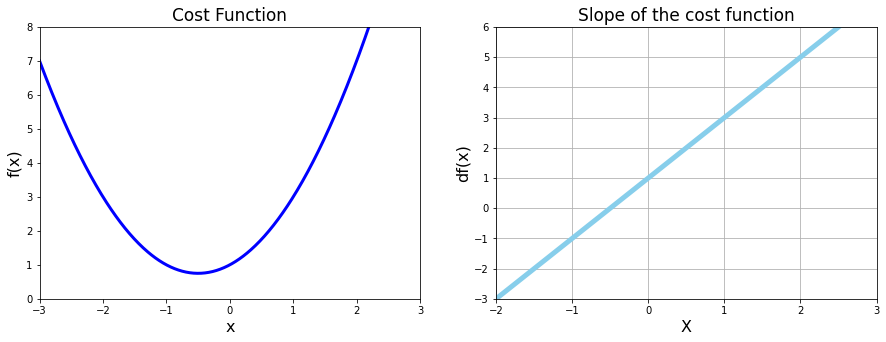

In [11]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

# Chart 1: Cost function

plt.subplot(1, 2, 1)

plt.xlim((-3, 3))
plt.ylim(0, 8)

plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.title('Cost Function', fontsize=17)


plt.plot(x_1, f(x_1), color='blue', linewidth=3)

#Chart 2: Derivative 

plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()

plt.xlim((-2, 3))
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Python Loop & Gradient Descent

In [12]:
# Python For Loop
for n in range(5):
    print('Hello World', n)
print('End of loop')    

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of loop


In [13]:
# Python While loop
counter = 0
while counter < 7: # whatever follows the while loop is the condition that checks the loop, the programs runs until it fails
    print('counting...', counter) # You have to make sure your loop ends
    counter = counter + 1
print('Ready or not here I come!')    

counting... 0
counting... 1
counting... 2
counting... 3
counting... 4
counting... 5
counting... 6
Ready or not here I come!


In [14]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    # print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('loop ran this many times: ', n)
        break
    
print('Local minimum occurs at: ', new_x)
print('Slope or df(x) value at this point is: ', df(new_x))
print('f(x) value at this point is: ', f(new_x))

loop ran this many times:  50
Local minimum occurs at:  -0.49996003706460423
Slope or df(x) value at this point is:  7.992587079153068e-05
f(x) value at this point is:  0.7500000015970362


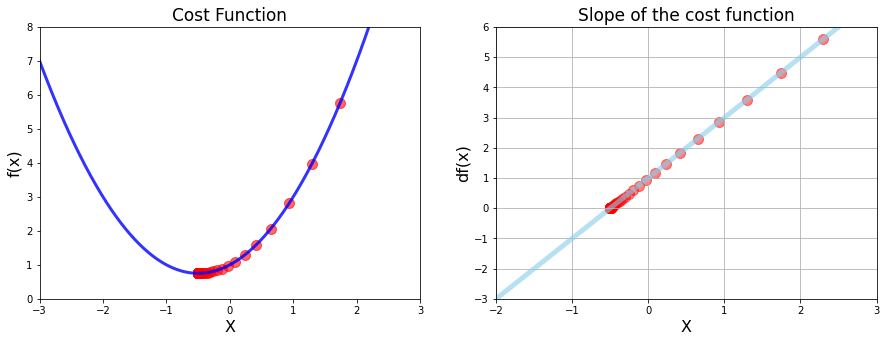

In [15]:
# Super impose the gradient descend calculation on plot

plt.figure(figsize=[15,5])

# Chart 1: Cost function

plt.subplot(1, 2, 1)

plt.xlim((-3, 3))
plt.ylim(0, 8)

plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

#Chart 2: Derivative 


plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()

plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)
            

plt.show()

# Example 2: Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [16]:
# Make some data

In [17]:
x_2 = np.linspace(-2, 2, 1000)

In [18]:
def g(x):
    return x**4 - 4*x**2 + 5


def dg(x):
    return 4*x**3 - 8*x 

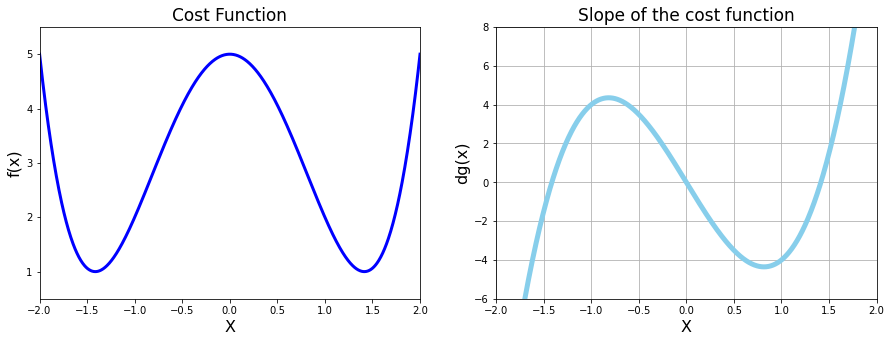

In [19]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

# Chart 1: Cost function

plt.subplot(1, 2, 1)

plt.xlim((-2, 2))
plt.ylim(0.5, 5.5)

plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

#Chart 2: Derivative 

plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()

plt.xlim((-2, 2))
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()

## Gradient decent as a python function

In [20]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
# To indent a whole group of funtion use crtl + ] key
    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list


In [21]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('local min occurs at:', local_min)
print('number of steps:', len(list_x))

local min occurs at: 1.4122375085019094
number of steps: 23


In [22]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, multiplier=0.02, 
                                                 precision=0.001)
print('local min occurs at:', local_min)
print('number of steps:', len(list_x))

local min occurs at: -1.4122375085019094
number of steps: 23


In [23]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print('local min occurs at:', local_min)
print('number of steps:', len(list_x))

local min occurs at: -1.4120887490901561
number of steps: 34


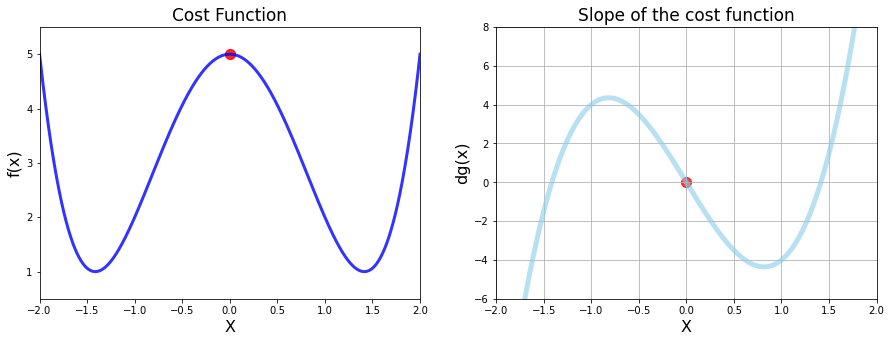

In [24]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0)
# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# Chart 1: Cost function

plt.subplot(1, 2, 1)

plt.xlim((-2, 2))
plt.ylim(0.5, 5.5)

plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)
#Chart 2: Derivative 

plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()

plt.xlim((-2, 2))
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3: Divergence, Overflow and Python Tuples
## $$h(x) = x^5 - 2x^4 + 2$$

In [25]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

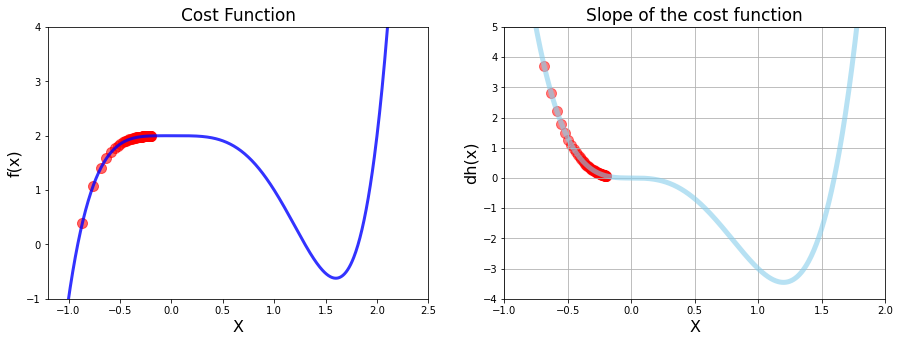

Local min occurs at:  -2071072.4470816324
Cost at this minimum is:  -3.810455326061589e+31
Number of steps:  71


In [26]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter=70)
# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# Chart 1: Cost function

plt.subplot(1, 2, 1)

plt.xlim((-1.2, 2.5))
plt.ylim(-1, 4)

plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)
#Chart 2: Derivative 

plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()

plt.xlim((-1, 2))
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

In [27]:
import sys
#sys.version
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [28]:
# Creating a Tuple- tuple packing
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

# How to access a value in a tuple
print('I looooove', breakfast[0])
print('The hotel room has no '+str(unlucky_numbers[1])+'th floor')

# Tuples are heterogenous and they are immutable, to create a tuple with single value, we need to add a comma at the end of the 
# value
tuple_with_single_value = 32,
not_my_address = 12, 'infinite loop', 'cupertino', 41658

I looooove bacon
The hotel room has no 4th floor


# The Learning Rate

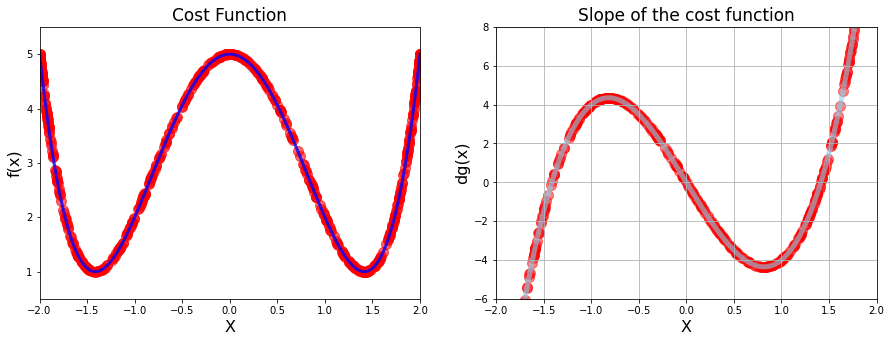

Number of steps is:  501


In [32]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.02,
                                                max_iter=500)
# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# Chart 1: Cost function

plt.subplot(1, 2, 1)

plt.xlim((-2, 2))
plt.ylim(0.5, 5.5)

plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)
#Chart 2: Derivative 

plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()

plt.xlim((-2, 2))
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

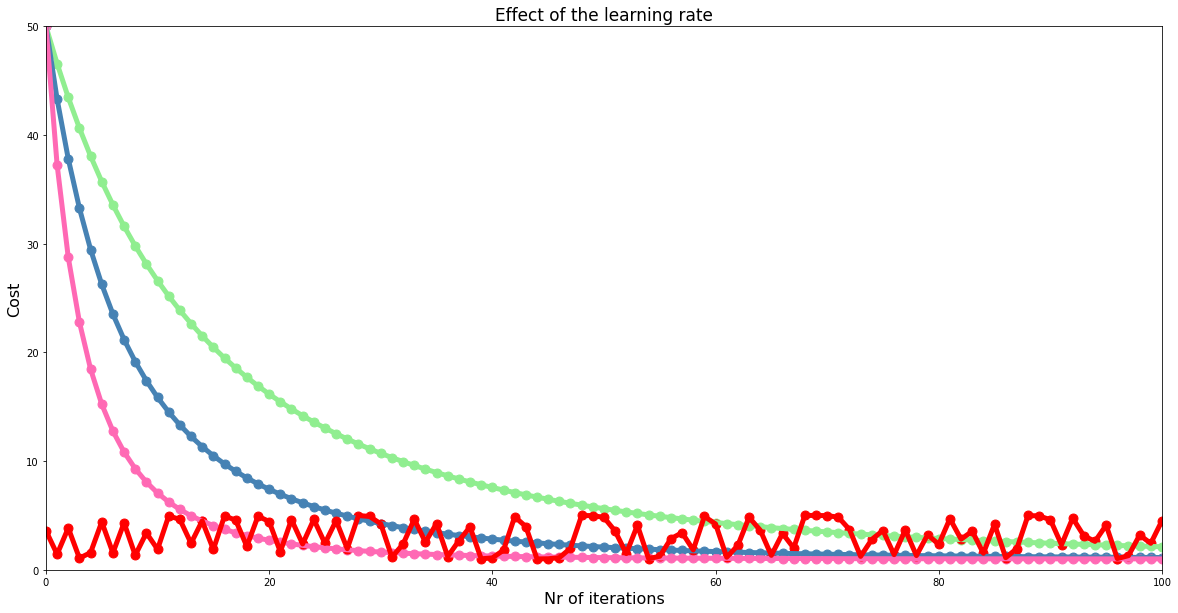

In [37]:
# Run gradient descent 3 times
n=100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005,
                                                precision=0.0001, max_iter=n)


#Plot more learning rate

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001,
                                                precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002,
                                                precision=0.0001, max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25,
                                                precision=0.0001, max_iter=n)


# Plotting reduction in cost for each iteration

plt.figure(figsize=[20,10])

plt.xlim((0, n))
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Nr of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
#1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', s=80)

# Plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', s=80)

# Plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=80)

plt.show()

# Example 4: Data Viz with 3D Charts
## Minimise $$f(x,y) = \frac{1}{3^{-x^2-y^2} + 1}$$

Minimise $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2 - y^2}$

In [38]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [46]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


C:\Users\HP\AppData\Local\Temp/ipykernel_8232/3514878377.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


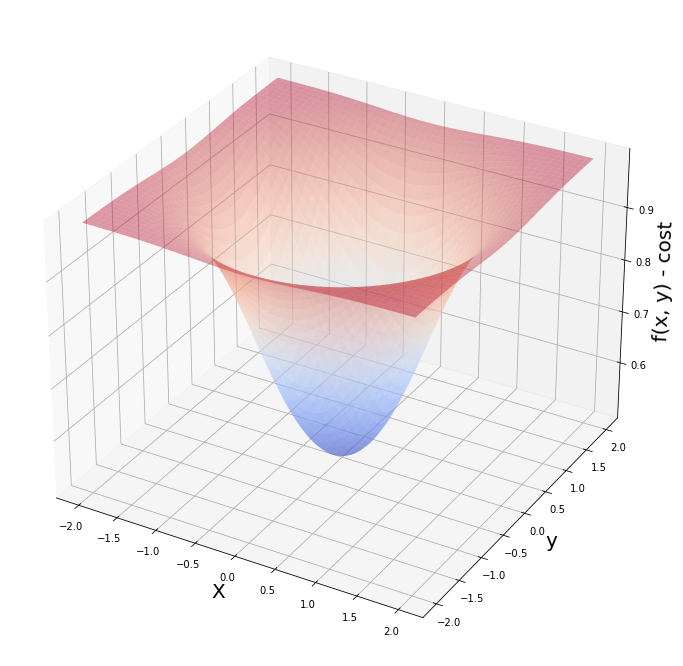

In [58]:
# Generating 3D plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('f(x, y) - cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()